## 1. Perkenalan Dataset

### Sumber Dataset  
Dataset yang digunakan dalam proyek ini diperoleh dari **Kaggle**, sebuah platform berbagi dataset dan kompetisi machine learning yang banyak digunakan oleh komunitas data science. Dataset ini berjudul [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) dan dipublikasikan oleh pengguna *johnsmith88*.

### Deskripsi Dataset  
Dataset ini berisi data medis yang berkaitan dengan kemungkinan seseorang menderita penyakit jantung. Data dikumpulkan dari empat lokasi medis yang berbeda, yaitu Cleveland, Hungary, Switzerland, dan Long Beach. Namun, sebagian besar studi hanya menggunakan data dari Cleveland karena dataset ini paling lengkap dan bersih.

Dataset ini sering digunakan dalam penelitian prediksi penyakit jantung dan mengandung fitur-fitur klinis seperti:
- Umur
- Jenis kelamin
- Tekanan darah istirahat (Resting Blood Pressure)
- Kolesterol
- Denyut jantung maksimum (Max Heart Rate Achieved)
- Angina yang disebabkan oleh olahraga (Exercise Induced Angina)
- Hasil elektrokardiogram, dan lainnya

### Tujuan Penggunaan Dataset  
Tujuan dari penggunaan dataset ini adalah untuk membangun model machine learning yang dapat memprediksi apakah seseorang memiliki risiko penyakit jantung atau tidak berdasarkan fitur-fitur medis yang tersedia. Model ini diharapkan dapat membantu dalam proses diagnosis awal dan pengambilan keputusan klinis.


## 2. Import Library

## 3. Memuat Dataset

Pada tahap ini, dataset akan dimuat ke dalam proyek menggunakan pustaka **Pandas**. Karena dataset berada di penyimpanan lokal, kita dapat langsung mengaksesnya dengan memberikan path ke file tersebut.

In [1]:
import pandas as pd
import os

# Memuat dataset dari direktori lokal
file_path = os.path.join('..', 'heartDisease_raw', 'heartDisease_raw.csv')
data = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(data.head())

Lima baris pertama dari dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah tahap penting dalam proses analisis data untuk memahami struktur, pola, dan anomali dalam dataset. Tujuan dari EDA adalah untuk memperoleh wawasan awal mengenai data yang akan digunakan dalam proses pemodelan.

In [2]:
# Menampilkan informasi dasar tentang dataset
print('--- Info Dataset ---')
print(data.info())

# Menampilkan statistik deskriptif dari kolom numerik
print('\n--- Statistika Deskriptif ---')
print(data.describe())

# Mengecek jumlah missing values per kolom
print('\n--- Cek Missing Values ---')
print(data.isnull().sum())

# Mengecek jumlah data duplikat
print('\n--- Cek Duplikat ---')
print(f'Jumlah data duplikat: {data.duplicated().sum()}')

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

--- Statistika Deskriptif ---
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.4

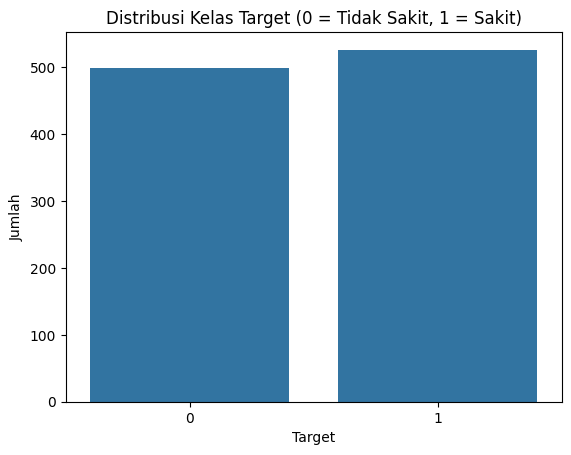

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Visualisasi Distribusi Target ---
sns.countplot(x='target', data=data)
plt.title('Distribusi Kelas Target (0 = Tidak Sakit, 1 = Sakit)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

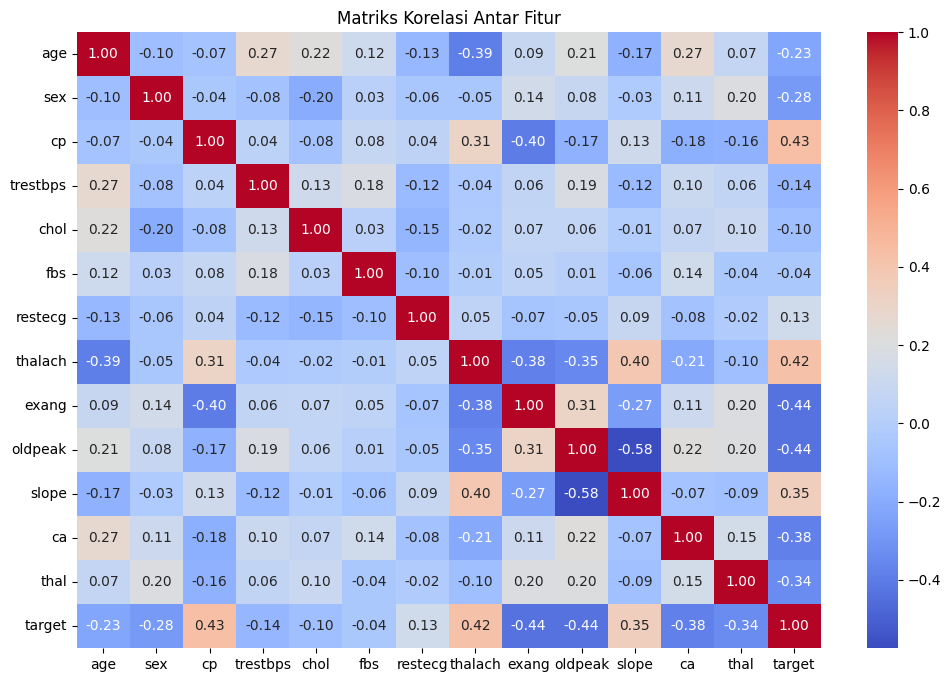

In [4]:
# --- Visualisasi Korelasi antar Fitur ---
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

## 5. Data Preprocessing

Pada tahap ini, **data preprocessing** adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

- Menghapus Data Duplikat
- Deteksi dan Penanganan Outlier
- Normalisasi Fitur Numerik


In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Menghapus Duplikat
data = data.drop_duplicates()
print(f" Data setelah menghapus duplikat: {data.shape[0]} baris")

# Deteksi Outlier pada Kolom Numerik 
feature_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
feature_cols.remove('target')

# Hitung Z-score hanya untuk fitur
z_scores = np.abs(stats.zscore(data[feature_cols]))
data = data[(z_scores < 3).all(axis=1)]
print("Jumlah data setelah menghapus outlier:", data.shape[0])

# Normalisasi Fitur Numerik 
scaler = StandardScaler()
data[feature_cols] = scaler.fit_transform(data[feature_cols])
print("\nFitur numerik berhasil dinormalisasi (target tidak disentuh).")


print("\nDataset Setelah Preprocessing:")
print(data.head())
print("\nInfo Dataset:")
print(data.info())

 Data setelah menghapus duplikat: 302 baris
Jumlah data setelah menghapus outlier: 287

Fitur numerik berhasil dinormalisasi (target tidak disentuh).

Dataset Setelah Preprocessing:
        age       sex       cp  trestbps      chol       fbs   restecg  \
0 -0.257180  0.670444 -0.93874 -0.355165 -0.709016 -0.408248  0.887476   
1 -0.147015  0.670444 -0.93874  0.529153 -0.905348  2.449490 -1.013312   
2  1.725795  0.670444 -0.93874  0.823925 -1.537974 -0.408248  0.887476   
3  0.734307  0.670444 -0.93874  1.000789 -0.905348 -0.408248  0.887476   
4  0.844473 -1.491549 -0.93874  0.411244  1.079790  2.449490  0.887476   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.808268 -0.697887 -0.004522  0.971296  1.453275  1.175999       0  
1  0.230779  1.432896  1.942086 -2.327663 -0.713426  1.175999       0  
2 -1.101888  1.432896  1.478608 -2.327663 -0.713426  1.175999       0  
3  0.497312 -0.697887 -0.931478  0.971296  0.369925  1.175999       0  
4 -1.945911 -

In [6]:
output_path = 'heartDisease_preprocessing.csv'
data.to_csv(output_path, index=False)
print(f"\n Dataset hasil preprocessing berhasil disimpan ke: {output_path}")


 Dataset hasil preprocessing berhasil disimpan ke: heartDisease_preprocessing.csv
